# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each.

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [9]:
boston = pd.read_csv("boston_data.csv")

In [11]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [12]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [14]:
# Check for missing values
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [16]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [17]:
# Recalculate IQR excluding 'medv'
features_except_medv = boston.columns.difference(['medv'])
Q1_except_medv = boston[features_except_medv].quantile(0.25)
Q3_except_medv = boston[features_except_medv].quantile(0.75)
IQR_except_medv = Q3_except_medv - Q1_except_medv

# Define outliers based on the recalculated IQR, excluding 'medv'
outliers_except_medv = ((boston[features_except_medv] < (Q1_except_medv - 1.5 * IQR_except_medv)) | (boston[features_except_medv] > (Q3_except_medv + 1.5 * IQR_except_medv)))

# Remove outliers from the dataset, excluding 'medv' from the outlier detection
boston = boston[~outliers_except_medv.any(axis=1)]

# Comparing the shape of the original dataset and the newly cleaned dataset
cleaned_shape_except_medv = boston.shape

cleaned_shape_except_medv


(234, 14)

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

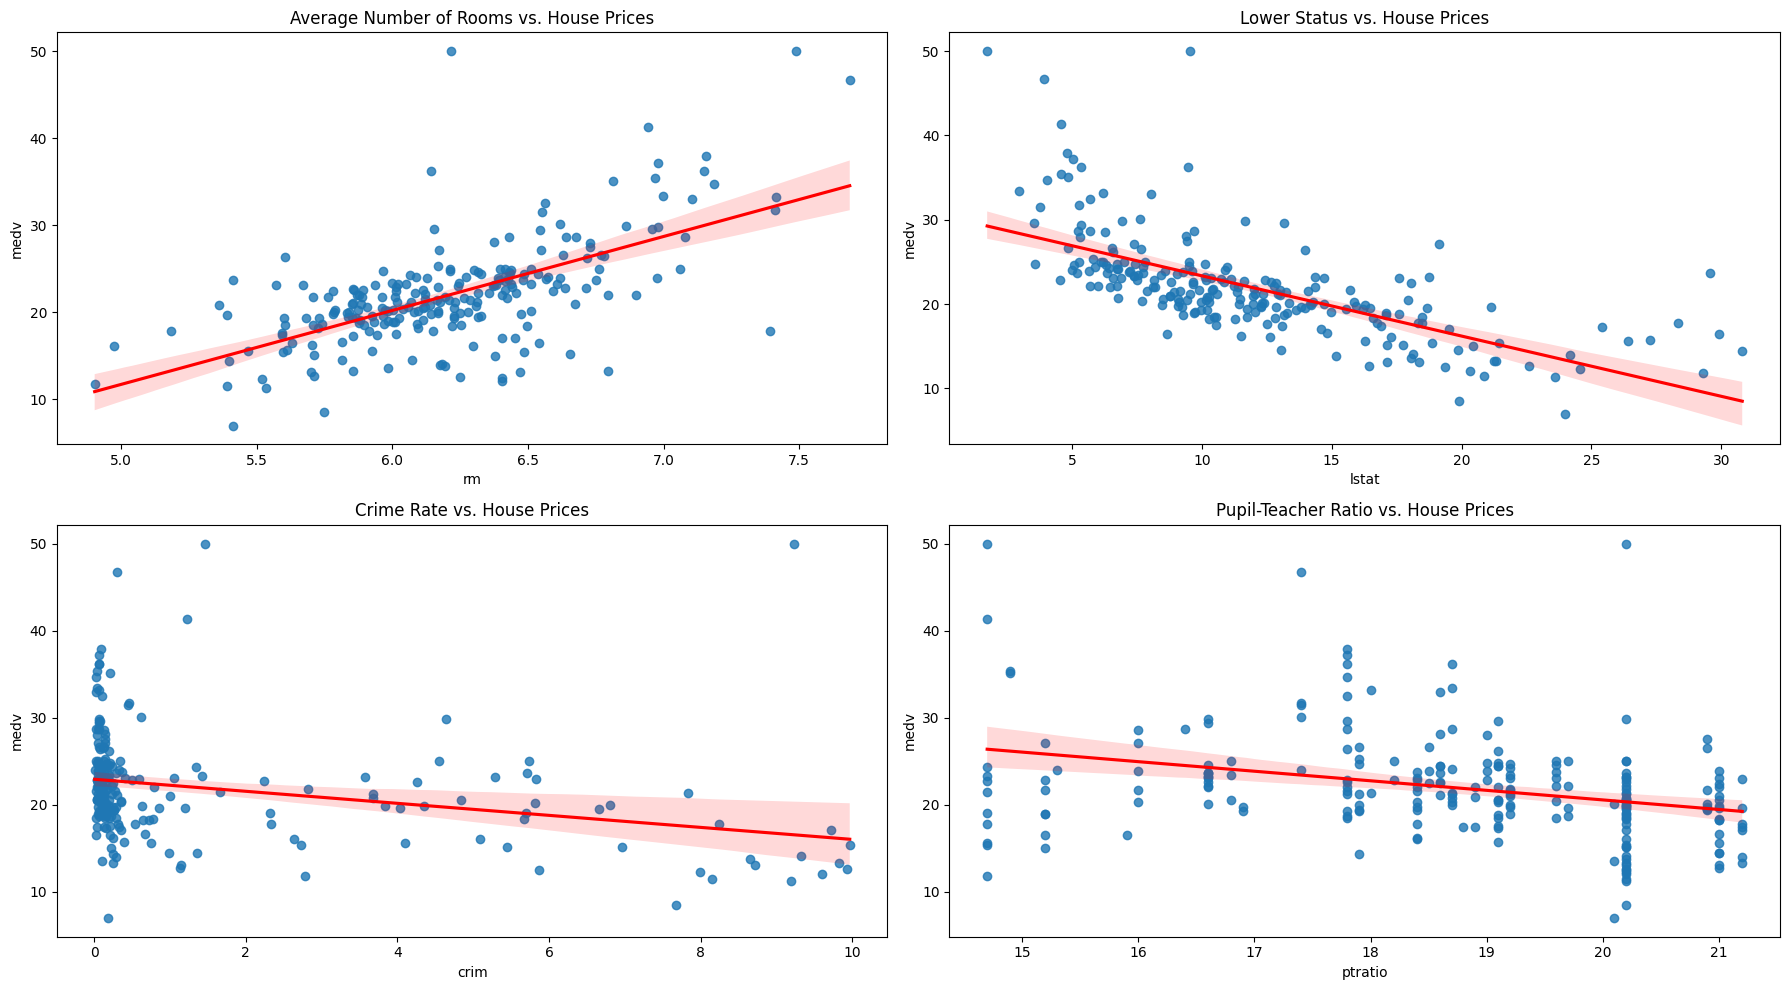

In [18]:
# Setting up the matplotlib figure
plt.figure(figsize=(18, 10))

# RM vs. MEDV
plt.subplot(2, 2, 1)
sns.regplot(x='rm', y='medv', data=boston, line_kws={"color": "red"})
plt.title('Average Number of Rooms vs. House Prices')

# LSTAT vs. MEDV
plt.subplot(2, 2, 2)
sns.regplot(x='lstat', y='medv', data=boston, line_kws={"color": "red"})
plt.title('Lower Status vs. House Prices')

# CRIM vs. MEDV
plt.subplot(2, 2, 3)
sns.regplot(x='crim', y='medv', data=boston, line_kws={"color": "red"})
plt.title('Crime Rate vs. House Prices')

# PTRATIO vs. MEDV
plt.subplot(2, 2, 4)
sns.regplot(x='ptratio', y='medv', data=boston, line_kws={"color": "red"})
plt.title('Pupil-Teacher Ratio vs. House Prices')

plt.tight_layout()
plt.show()


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [19]:
# Your response here
# Factors that enhance the desirability of living in an area (like more living space or better educational conditions) tend to increase home prices, while factors that detract from living quality (like higher crime rates or indicators of socioeconomic challenges) tend to decrease home prices.

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

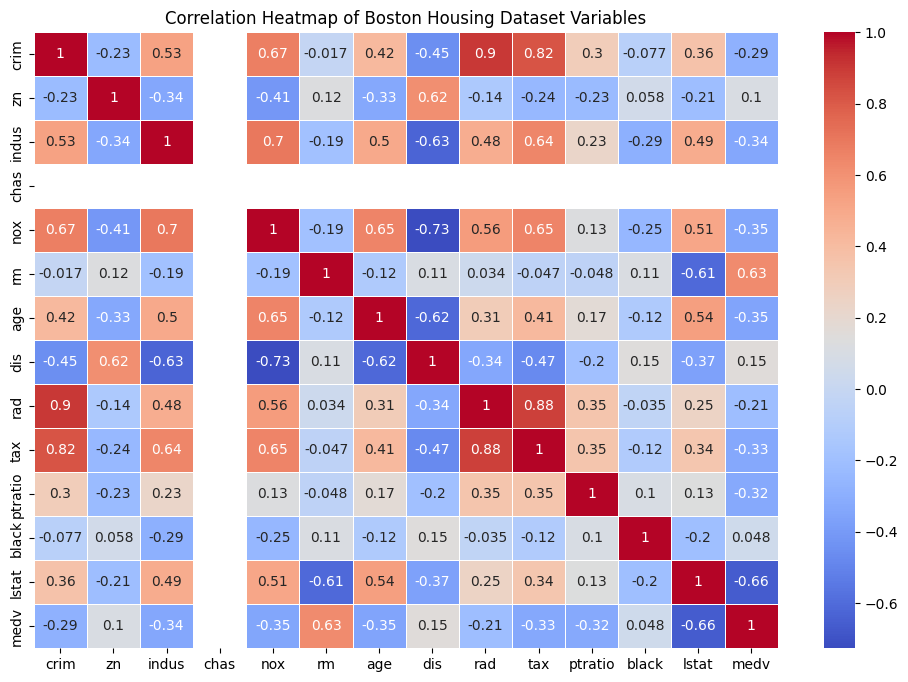

In [20]:
# Your response here
# Compute the correlation matrix
correlation_matrix = boston.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Boston Housing Dataset Variables')
plt.show()

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.

In [21]:
# Calculate descriptive statistics for the housing price (medv) in the cleaned 'boston' dataset
housing_price_stats = boston['medv'].describe()

# Calculating median separately as 'describe' does not include median by default
median_price = boston['medv'].median()

# Adding median to the descriptive statistics
housing_price_stats['median'] = median_price

housing_price_stats

count     234.000000
mean       21.988034
std         6.118678
min         7.000000
25%        18.900000
50%        21.400000
75%        23.975000
max        50.000000
median     21.400000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score.

In [23]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between
        true and predicted values based on the metric chosen. """
    # Your code here:
    score = r2_score(y_true, y_predict)
    return score

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test.

In [25]:
# Your code here

# Splitting the features and the target variable
X = boston.drop('medv', axis=1)
y = boston['medv']

# Splitting the dataset into training and testing sets with a test size of 20% and shuffling the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Checking the sizes of the training and testing datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((187, 13), (47, 13), (187,), (47,))

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively.

In [28]:
# Five separate RFR here with the given max depths

# Setting max_depth values for different models
max_depths = [2, 4, 6, 8, 10]

# Dictionary to store training and testing scores for different models
scores = {
    'max_depth': [],
    'train_score': [],
    'test_score': [],
    'train_rmse': [],
    'test_rmse': []
}

for depth in max_depths:
    # Building the Random Forest Regressor model with the specified max_depth
    model = RandomForestRegressor(max_depth=depth, n_estimators=10, random_state=42)
    model.fit(X_train, y_train)

    # Predicting on the training and testing set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculating R^2 score for the training and testing set
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Calculating RMSE for the training and testing set
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Storing the results
    scores['max_depth'].append(depth)
    scores['train_score'].append(train_score)
    scores['test_score'].append(test_score)
    scores['train_rmse'].append(train_rmse)
    scores['test_rmse'].append(test_rmse)

scores_df = pd.DataFrame(scores)
scores_df


,max_depth,train_score,test_score,train_rmse,test_rmse
0,2,0.655520,0.482878,3.597876,4.319640
1,4,0.845296,0.550572,2.411094,4.026993
2,6,0.892445,0.615594,2.010388,3.724310
3,8,0.916119,0.648837,1.775401,3.559635
4,10,0.926872,0.648288,1.657699,3.562412


*Now*, plot the score for each tree on the training set and on the testing set.

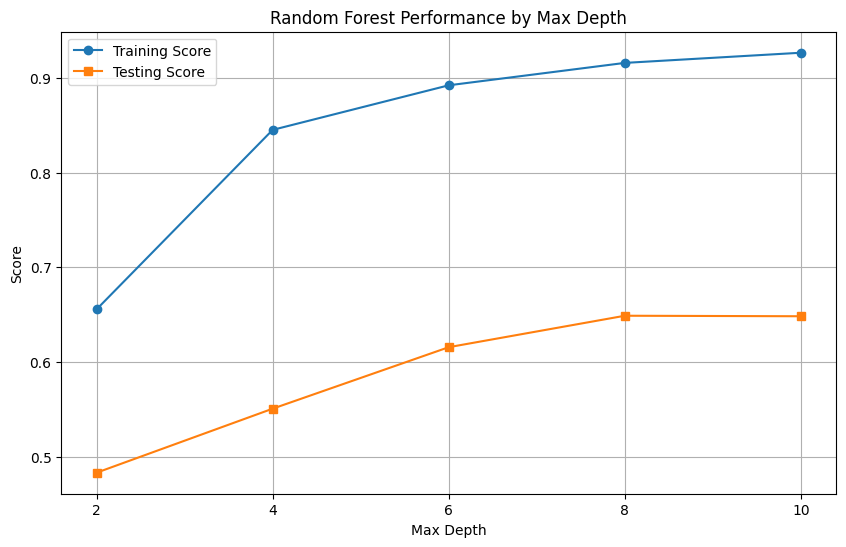

In [29]:
# Produce a plot with the score for the testing and training for the different max depths

plt.figure(figsize=(10, 6))

# Plotting training and testing scores
plt.plot(scores_df['max_depth'], scores_df['train_score'], label='Training Score', marker='o')
plt.plot(scores_df['max_depth'], scores_df['test_score'], label='Testing Score', marker='s')

# Plotting configurations
plt.title('Random Forest Performance by Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.xticks(max_depths)
plt.legend()
plt.grid(True)

plt.show()


What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [ ]:
# Your response here

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here